<a href="https://colab.research.google.com/github/AndrewCrossman/DSPS_ACrossman/blob/main/DSPS2021exam_FeatureEngineering_PLAsTIcCchallenge_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSPS2021 exam


This is an exercise in **classification** based on **feature engineering**. In the _first part_  (feature engineering) of the exercise you will acquire and process the data, using statistical tools and knowledge from the first half of the semester. This will lead to a set of features that characterize each object which you will use in _the second part_ (classification) to choose and build a model that performs classification tasks and evaluate its results.



Complete this exercise and turn it in to me **by emailing me the google colab link** within 72 hours. Then I will see you at your "interview" which is the oral portion of the exam. In the oral session you will duscuss and explain your choices.

**What I expect in the written exam:**
I expect that you will perform the following tasks after having acquired the data:
- data exploration
- preprocessing including scaling as apprioriate for the model you chose
- model development and fitting
- evaluation of your model performance


I expect figures with captions and axis labels (please dont forget axis labels and captions! its the easiest way to make me mad!) wherever apprioriate to understand the data/results. 

I expect that you will discuss each step and to what extent it was successful, to what extent it can be improved. 

I expect a justification for all your choices (e.g. how you deal with missing values) includind a description of the shortcomings of your choice

I expect your code to be reproducible and to run: reproducible means that when I run it I should get the exact same numbers. Where random numbers are used you should _seed_ your random sequence (by setting a seed or the random_state if available in the model). Running means that your code should, well... run. Meaning when I click Runtime RunAll the code should not stop until the last cell. Make sure you rerun your code from the beginning to assure it works before you deliver it!   

Put your "narrative" in text cells. Present the code neatly, deleting cells of code used for testing but leaving in all cells needed for the code to work.

461 students: graded out of 15 points (17 available + EC)
661 students: graded out of 20 points (21 available + EC_)

OVERVIEW

PART I: Data preparation:

1. Data Acquisition  <font color='blue'>
3 points </font>
2. Data exploration and visualization  <font color='blue'> 3 points</font>
3. Extract features <font color='blue'> 5 points</font>
- Task III.1 describe each feature you plan to extract.
- Task III.2 extract some features from the raw lightcurve 
- Task III.3 standardize the lcvs and extract some features from the raw lightcurve 
- Task III.4: extract some features from the metadata 
- Task III.5: assemble and show your feature space

PART II: Classifying:

4. Task IV: Create your train and test set out of the feature matrix and preprocess them with the appropriately (remember that based on the model you choose you may need to scale, normalize, standardize, or whiten your data) <font color='blue'> 2 points</font>

5. Easy classification task <font color='blue'>4 points</font>
- Task V.I Build a model and fit it to the data (2 pts)
- Task V.II Measure model accuracy and comment <font color='blue'> 1 points</font>
- Task V.III Visualize the model results <font color='blue'> 1 points</font>

6. Harder classification task - mandatory for 661 EC for 461 <font color='blue'>4 points</font> 
- Task VI.I Build a model, (ideally use a different one or try the same one you used before _and_ a different one to compare, can be 2 models from the same family tho, like two different ensamble methods) and fit it to the data (2 pts) 
- Task VI.II Measure model accuracy and comment <font color='blue'> 1 points</font>
- Task VI.III Visualize the model results <font color='blue'> 1 points</font>

EC: try to visualize the features. This is a high dimensional parameter space. you can for example try 2D t-SNE projection of your feature space and visualize it. <font color='blue'>2 points</font>





<font color='red'>IMPORTANT: if you get stuck in part 1, for example in taks 3, you can download _my_ features dataset and move on to the classification task. You will not get points for the feature extraction tasks you did not perform but you will still get points for modeling</font>

## OVERVIEW

The PLAsTiCC challend is a Kaggle challange to classify astrophysical objects (e.g. stars, exploding stars, stars with planets transiting, black holes) based on their time variability in light emission in 6 different bands (i.e. wavelength ranges). The sampling (the cadence of the observations) is designed to show what the upcming Rubin Observatory LSST (Legacy Survey of Space and Time) will see when it starts observing (in 2024). 

You can refer to this notebook https://www.kaggle.com/michaelapers/the-plasticc-astronomy-starter-kit (written by my good friend Gautham Narayan) to get started and ingest and preprocess the PLASTiCC challenge data. If you are not familiar with python classes (object oriented syntax) do not worry about it: I do want you to extract the features yourself. So use it as a guideline, but do not just copy and paste.

Your task is to extract features, i.e. representations of the time series, and run 2 classifiers on these models: one to identify which survey the data comes from, one to identify which kind of object it is. 



In [ ]:
#hide
import pandas as pd
import numpy as np
import pylab as pl

%pylab inline


Populating the interactive namespace from numpy and matplotlib


# TASK I :  Data Acquisition 3 points
 For full points use the kaggle API to get the data. You can download the data from kaggle
 --- https://www.kaggle.com/c/PLAsTiCC-2018
 If that does not work you can get the data from Zenodo but make sure that it is a reproducible way (the downloading has to happen inside the notebook).
 --- https://zenodo.org/record/2539456#.XonrIdNKjOQ
You will need the **training data and the metadata files** only - you wont need to use the test data


In [ ]:
# NOTE::: below I am just reading a local file. This is not a reproducible way to do it!!!!!! this would cost points: 
# reproducible means I need to be able to run your code from top to bottom without 
# having to exit the code and perform click-like actions
# if you cannot figure out a reproducible way to access the data provide details in a markdown (text) box
# about how you obtained the data so i can run your code and redo what you did

lcvs = pd.read_csv("data/plasticc_train_lightcurves.csv")

# The Zenodo data include 1.4 million datapoints. 
## -- I am subsampling the data to develop the code 
# by using only the first 10000 datapoints (lcvs[:10000])
## -- When I am done I will run this on the larger dataset (commenting out #[:10000])
## note that I am choosing the first N=1000, as opposed to 1 every 100 or some other sampling scheme 
## because there are 6 time series per obects in 6 filters (colors) and I need each time series to be complete

lcvs = lcvs#[:10000]
print("The dataset contains: (observations, columns)", lcvs.shape)


The dataset contains: (observations, columns) (1421705, 6)


In [ ]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


read the Kaggle challenge for a description of the data . This "Starter Kit" which includes a notebook (written by y good friend Gautham Narayan) may be especially useful
https://www.kaggle.com/michaelapers/the-plasticc-astronomy-starter-kit

For each object there are 6 time series in 6 different passbands (see overview.) 

In [ ]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [ ]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [ ]:
metadata = pd.read_csv("data/plasticc_train_metadata.csv.gz")
metadata.head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,...,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,...,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,...,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,...,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,...,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'ddf_bool', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target',
       'true_target', 'true_submodel', 'true_z', 'true_distmod',
       'true_lensdmu', 'true_vpec', 'true_rv', 'true_av', 'true_peakmjd',
       'libid_cadence', 'tflux_u', 'tflux_g', 'tflux_r', 'tflux_i', 'tflux_z',
       'tflux_y'],
      dtype='object')

In [ ]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 26)


make sure you print statements like the ones above summarizing the size of the datasets you acquire and you show the beginning of each dataset



# TASK II : data exploration and visualization - plot some time series - 3 points
### 1) You always need to visualize your data to get a sense of what we are working with. The challenge is that here you have 6 photometric bands (6 filters that cover different waelength ranges) for each object. (2 points)

**Include object 84716**

### 2) Visualize the distribution of each of the feature of the metadata (1 point)

In [ ]:
# -- plot many objects
...

In [ ]:
# this may help but if it is not clear how to use it dont worry abot it
# preparing a normalization to pass to the color map to map red filters to red blue filters to blue
norm_band = Normalize(vmin=bands.min(), vmax=bands.max())


**Minimum Deliverable**

Figure 1: ...

* Deliverable: make a plot for a subset of the objects (~10 at least). Describe what you are plotting and any notable things you see in the figure. Make sure you plot the time series (flux) against time (mjd) and also display the uncertainties int he measurement (fluxerr)

Figure 2:...


*   Show the distribution of the features in the metadata



# TASK III: Extract features - 5 points

### Feature extraction refers to the extraction of statistical features of the datapoints or the generation of low dimensional representations of the data points that can then be passed to a classifier/regression

### * **Minimum Deliverable** Extract at least 4 featues if you are taking PHYS461 and at least 6 if you are taking PHYS661 features including at least 1 feature from all three category below

The code that won the callenge did a number of smart things, of course (it was a feature based classification scheme, which included Gaussian Processes in the preprocessing for interpolation). The feature extraction part of the code is here. https://github.com/kboone/avocado/blob/master/avocado/plasticc.py

Examples of features you can extract:

- **from the original lightcurve**: 
    - mean, 
    - standard deviation, 
    - skewness, 
    - kurthosis, 
    - minimum 
    - maximmum,
    - error on the minimum and 
    - error on the maximum, 
- **from the standardized lightcurve**:
    - median 
    - slope of a line fit
    - intercept of a line fit
    - likelihood of the line fit
    - likelihood of a quadratic fit
    - sign of the quadratic parameter

- **from the metadata file**:
    - decl; this is one of the positions in the sky variables: important because the position on the sky may determin if it is a galactic or extragalactic object
    - ddf_bool ; the kind of survey i.e. the data collection scheme that lead to the time series
    - hostgal_photoz
    - hostgal_photoz_err
    
The feature in the metadata files are the hardest ones to decide on because they require domain knowledge.
Most of the other features in the metadata are unknown for test objects (only known for the training set)


Extract N features including 1 features from all three category above: original lcv, standardized lcv, metadata. Justify each feature. Coming up with different features than the ones I suggested is very welcome! Remember that if the features are extracted from the time series there will be 6 features for each choice feature (one for each of the 6 passbands) so I ended up with 94 features with the scheme outlined above.

Note: we are working with bigg-ish data! 
First off: every new piece should be developed on a subset of the dataset, then run on all the data only when ready. 
Still, if you try achieve goals by implementing for loops you are not going to be able to run the notebook for the whole data, or even only 1 batch of the full datase. A good solution is to use the groupby() method in pandas. I used groupby everywhere. Also it may be wise to write out intermediate outputs, so you do not have to loose work if your kernel dies or something similar. 

### TASK III.1 describe each feature you plan to extract. 
Briefly indicate why you think it is a valuable feature and what data type is it (e.g. continuous, binary, categorical, if continuous does it have a max or min value or is it unbound?)

        

### TASK III.2 extract some features from the raw lightcurve -

I have some examples of how I did it in the next few lines of code. _you do not have to follow my code or my choices. They are given to help you_

Example get the mean and standard deviation of the flux in each band for each object

In [ ]:
means = lcvs.groupby(["object_id", "passband"])[["flux"]].mean()
...

In [ ]:
features = means.rename({"flux": "mean"}, 
                        axis=1).merge(stds.rename({"flux": "std"}, 
                                axis=1), left_index=True, right_index=True)

higher order moments of the distribution can be obtained with the scipy.stats.moment() function which can be applied to a grouby() object
note that this way you can apply a function that takes only one argument, the argument over which groupby iterates (the flux here). But moments take 2: the value and the moment Create a unction call

In [ ]:
from scipy import stats 
def m2(x):
    return stats.moment(x, moment = 2)
m2 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m2)
m3 = ...

In [ ]:
features = ...

In [ ]:
features = ...

### TASK III.3 Standardize the lcvs and extract some features from the raw lightcurve - 
I have some examples of how I did it in the next few lines of code

In [ ]:
lcvs["fluxnormed"] = 0.

In [ ]:
# normalize each LC this is very slow. can you make  it faster?
def normed(df):
   ...
   return df
    
    
lcvs = lcvs.groupby(["object_id", "passband"]).apply(normed)

# this is how it could be done in a for loop. But it would take hours!!
#for obj in  objects:
#    for band in bands:
#        lcvs[lcvs.object_id == obj][lcvs.passband == band].normedflux =\
#             lcvs[lcvs.object_id == obj][lcvs.passband == band].flux - means.loc[obj, band]
#        lcvs[lcvs.object_id == obj][lcvs.passband == band].normedflux /= stds.loc[obj, band]

# IF YOU GET STUCK ON THIS LOOK AT MY SOLUTION HERE https://gist.github.com/fedhere/b504759cb4513e1cfcf3727760c50589


In [ ]:
# replot the normalized time series to make sure I did it right
...

Figure : ...

min and max: if I did not get the means before I would store these data. seance I have the mean and the min max of the not standardized data this is irrelevant


the median of the standardizeed distribution will convey the location of the "center of mass" of the data with respect to the mean


In [ ]:
features = ...


extract some features that come from simple models of the lightcurve



a line fit to the standardized data and store the slope and intercept as new features. See here for how to apply this with a groupby https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
If you can use groupby you get an extra point (cause that would be a very efficient way to do it)

In [ ]:
def linfit(lc):
    '''
    fits a line to a lightcurve and returns the parameters:
    input:
      lc: the array containing the lightcurve datapoints
    output:
      slope
      intercept
      '''
    pars = ...
    return pars
linfits = lcvs.groupby(["object_id", "passband"]).apply(linfit)

In [ ]:
linfits.shape

(47088,)

In [ ]:
slopes = [x[0] for x in linfits.values[:]]
intercepts = ...


In [ ]:
features["slopes"] = slopes
features["intercepts"] = intercepts

A quadratic function can tell you if the time series is concave or convex. 
If we fit both line and a quadratic we can also us the likelihood ratio to see wchich fit is best (remember the first couple of classes)

In [ ]:
# this is slow!!
from statsmodels.formula.api import ols
def quadfit(x):
  ...
ols = lcvs.groupby(["object_id", "passband"]).apply(quadfit)

/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


## TASK III.4: features from metadata

when you do this think about what you need to perform the classification. before you decide briefly look at the tasks you have to peform in part 2

## Task III.5: assemble and show your feature space


### Manipulate your dataframe until it has N objects on the N rows and M features on the columnms. Note that this may take a few steps. _The partial code below is given to you as an example but you do not have to follow it_

<font color='red'>I strongly recommand you save these features in a csv file with allfeatures.to_csv(...) so that if your code crushes when you work on part two you can simply reread the feature file without rerunning the code!</font>

This was my dataframe after feature extraction. Yours will look different but it should be structured the same way: object + bandpass makes a row, features are the columns

In [ ]:
allfeatures.head()

,"(0, mean)","(0, std)","(0, m2)","(0, m3)","(0, maxs)","(0, mins)","(0, median)","(0, slopes)","(0, intercepts)","(0, ll1)",...,"(5, slopes)","(5, intercepts)","(5, ll1)","(5, ll2)","(5, ll3)",decl,ddf_bool,hostgal_photoz,hostgal_photoz_err,target
0,-3.254554,83.944735,6934.865833,6934.865833,125.182808,-116.913223,-0.080537,0.005676,-0.175947,-84.013092,...,0.021319,-0.596932,-76.917754,-77.386461,-1.0,-61.9438,1,0.000,0.000,92
1,-2.720398,7.113509,49.879128,49.879128,14.509829,-14.735178,-0.052914,-0.041433,1.429423,-45.801483,...,-0.037903,1.042343,-65.167686,-65.424297,-1.0,-27.7844,1,1.627,0.255,88
2,-0.048080,1.828872,3.298318,3.298318,5.942166,-3.459960,0.039463,-0.001798,0.063840,-101.249926,...,0.019612,-0.490299,-66.518080,-67.853917,1.0,-6.5796,1,0.226,0.016,42
3,1.797523,4.374445,18.869993,18.869993,18.014029,-3.874349,-0.169349,-0.013089,0.464675,-88.423048,...,-0.002816,0.076043,-64.783463,-77.536999,-1.0,-45.5867,1,0.281,1.152,90
4,0.660948,2.360084,5.481586,5.481586,5.330927,-6.804703,-0.033864,0.017117,-0.530614,-84.959510,...,0.015555,-0.435534,-76.526495,-76.666778,1.0,-63.8237,1,0.241,0.018,90


NOTE: this took several steps. The codes and output below convey some of those steps. You do not have to use this code, it is here to help you if you need it

In the way I cereated the feature dataframe I have a feature column for each object and bandpass. I need to manipulate the dataframe so that I have 6xN features per object where N is the number of eatures I engineered. 


In [ ]:
features.head()

mean         std             m2             m3  \
object_id passband                                                         
615       0          -3.254554   83.944735    6934.865833    6934.865833   
          1        -385.699911  601.787302  355904.026224  355904.026224   
          2        -134.146566  455.121346  203564.138816  203564.138816   
          3        -121.103501  335.425053  110570.138947  110570.138947   
          4         -55.954592  291.803449   83681.162283   83681.162283   

                          maxs         mins    median    slopes  intercepts  \
object_id passband                                                            
615       0         125.182808  -116.913223 -0.080537  0.005676   -0.175947   
          1         660.626343 -1100.440063 -0.170090  0.014032   -0.399902   
          2         611.984558  -681.858887 -0.289021  0.017676   -0.503760   
          3         445.737061  -530.644592 -0.122434  0.020475   -0.583524   
          4         381.953735  -422.184509 -0.163078  0.022343   -0.636786   

                          ll1        ll2  ll3  
object_id passband                             
615       0        -84.013092 -88.218652 -1.0  
          1        -80.867915 -80.869998 -1.0  
          2        -80.092803 -80.109763 -1.0  
          3        -79.226482 -79.290039 -1.0  
          4        -78.160027 -78.480261 -1.0

In [ ]:
# unstack will do the trick ... !!!make sure you save a copy of your features before maniulating them!!! in vase something goes wrong.
features = features.reset_index().set_index(['object_id','passband']).stack(
    ).unstack([1,2])


In [ ]:
features.head()

passband          0                                                   \
               mean        std           m2           m3        maxs   
object_id                                                              
615       -3.254554  83.944735  6934.865833  6934.865833  125.182808   
713       -2.720398   7.113509    49.879128    49.879128   14.509829   
730       -0.048080   1.828872     3.298318     3.298318    5.942166   
745        1.797523   4.374445    18.869993    18.869993   18.014029   
1124       0.660948   2.360084     5.481586     5.481586    5.330927   

passband                                                          ...  \
                 mins    median    slopes intercepts         ll1  ...   
object_id                                                         ...   
615       -116.913223 -0.080537  0.005676  -0.175947  -84.013092  ...   
713        -14.735178 -0.052914 -0.041433   1.429423  -45.801483  ...   
730         -3.459960  0.039463 -0.001798   0.063840 -101.249926  ...   
745         -3.874349 -0.169349 -0.013089   0.464675  -88.423048  ...   
1124        -6.804703 -0.033864  0.017117  -0.530614  -84.959510  ...   

passband              5                                                  \
                     m2            m3        maxs        mins    median   
object_id                                                                 
615        85370.493377  85370.493377  378.188141 -422.815094 -0.129163   
713           49.427194     49.427194   14.770886  -14.211164 -0.094281   
730          174.276892    174.276892   47.310059  -19.159811 -0.149763   
745          666.782529    666.782529  141.513290  -10.249387 -0.306851   
1124         451.382820    451.382820  109.157585  -10.860540 -0.229697   

passband                                                   
             slopes intercepts        ll1        ll2  ll3  
object_id                                                  
615        0.021319  -0.596932 -76.917754 -77.386461 -1.0  
713       -0.037903   1.042343 -65.167686 -65.424297 -1.0  
730        0.019612  -0.490299 -66.518080 -67.853917  1.0  
745       -0.002816   0.076043 -64.783463 -77.536999 -1.0  
1124       0.015555  -0.435534 -76.526495 -76.666778  1.0  

[5 rows x 72 columns]

In [ ]:
metadata.head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,...,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,...,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,...,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,...,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,...,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#finally, merging the features and metadatafeatures gave me allfeatures as I showed it above
allfeatures = features.merge(metadata...


* Deliverable: what is the shape of your final feature space?

In [ ]:
print("My feature space is {} features (columns)".format(...)

My feature space is 75 features (columns)


# Task IV: Create your train and test set out of the feature matrix and preprocess them with the appropriately (remember that based on the model you choose you may need to scale, normalize, standardize, or whiten your data) - 2 points

the kaggle challenges provide training and test data, but here create your own training/test from the data that you read in (the training set from kaggle)

make sure you deal with missing data

split train-test set

In [ ]:

from sklearn import preprocessing



#  PART II: Classifying:







# TASK V Easy classification task: 


### TASK V.I Build a model and fit it to the data

use as target variable **ddf_bool** - this is the kind of survey, i.e. the kind of observing strategy that is implemented. DDF stands for Deep Drilling Field and the observations are much more dense in time. This classification should be achievable.



### TASK V.II Deliverable I:
measure model accuracy and comment : what does the number obtained mean?


### TASK V.III Deliverable II: visualize the model result
Either ROC or Classification matrix (check the higgs boson notebook https://github.com/fedhere/DSPS_FBianco/tree/master/HW8)



## TASK VI Harder classification task - mandatory for 661 EC for 461:


### TASK VI.I Build a model and fit it to the data
Use an apprioriate classification method given your features dataset to classify objects predicting the "target" according to the **target** variable of the in the mtadata dataframe for both DDF and normal survey separately




### TASK VI.II Deliverable I: 
measure model accuracy and comment : what does the number obtained mean?



### TASK VI.III Deliverable II: Visualize model result
Either ROC or Classification matrix 


# EC: try to visualize the features. This is a high dimensional parameter space. you can for example try 2D t-SNE projection of your feature space and visualize it. 
If you are lucky, this will be a pretty plot!
a great model to **Visualize** structure in data is  t-SNE. Any other option you come up with is ok! You can choose to use the code below or to not to, there will be no penalty.

In [ ]:
from sklearn.manifold import TSNE

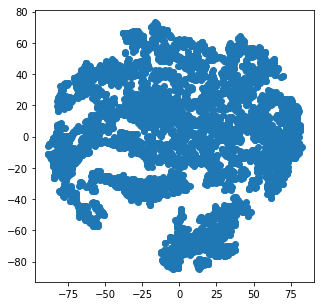

Figure: the 2D projection of the 79-dimensional feature space we created by extracting features from the time series. The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledianpairwise distances existing in the higher dimensional parameter space. How many clusters can you see in this embedding?A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, this is the only cxase in which you are allowed not to label your axes!


In [ ]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(X_scaled)
X_embedded.shape
pl.figure(figsize=(5,5))
pl.scatter(X_embedded[:,0], X_embedded[:,1])
pl.axis('off')
pl.show()
print("Figure: the 2D projection of the ~70-dimensional feature space we created by extracting features from the time series. " + 
      "The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: " + 
      "t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledian" + 
      "pairwise distances existing in the higher dimensional parameter space. " + 
      "How many clusters can you see in this embedding?" + 
      "A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, " + 
      "this is the only cxase in which you are allowed not to label your axes!")


We have to figure out if the clusters map to the target variable tho. So I will redo the plot colorcoded by target variable

In [ ]:
norm_obj= Normalize(vmin=y.min(), vmax=y.max())
len([c for c in pl.cm.RdBu_r(norm_obj(y))]), X_embedded.shape
pl.figure(figsize=(5,5))
pl.axis('off')
pl.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in pl.cm.viridis(norm_obj(y))], alpha=0.5);


write a caption if you do use the code above to make figures

Does this map better on other features in the metadata?

In [ ]:
for col in metadata.columns:
    v = metadata[col].astype(float)
    pl.figure(figsize=(5,5))
    pl.title(col)
    pl.scatter(X_embedded[:,0], X_embedded[:,1],  color=[pl.cm.RdBu_r(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in v])

    pl.show()